In [23]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 1. Import you data and perform basic data exploration phase

In [2]:
data = pd.read_csv("African_crises_dataset.csv")
data.head()

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


   * Display general information about the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_number                   1059 non-null   int64  
 1   country_code                     1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

   * Create a pandas profiling reports to gain insights into the dataset

In [4]:
from ydata_profiling import ProfileReport

In [5]:
data_profile = ProfileReport(data, title = "Africa Crisis", explorative = True)
data_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 14.95it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

   * Handle Missing and corrupted values
        * There are no missing values
        * `exch_usd` has 53 zeros, these rows will be dropped
        * Columns like country number and country code will be dropped

In [11]:
data['country'].value_counts()

country
Egypt                       155
South Africa                114
Zimbabwe                     90
Algeria                      85
Angola                       77
Morocco                      75
Tunisia                      75
Zambia                       72
Mauritius                    68
Kenya                        67
Ivory Coast                  63
Nigeria                      60
Central African Republic     58
Name: count, dtype: int64

In [13]:
# Duplicate the data set
africa_data = data

# Drop column
africa_data.drop(columns = ['country_number', 'country_code'], axis = 1, inplace = True)

In [15]:
# Drop 53 rows in exch_usd that are zero
africa_data['exch_usd'].drop(0, inplace = True)

   * Remove duplicates, if they exist
        * No duplicate column

   * Handle outliers, if they exist

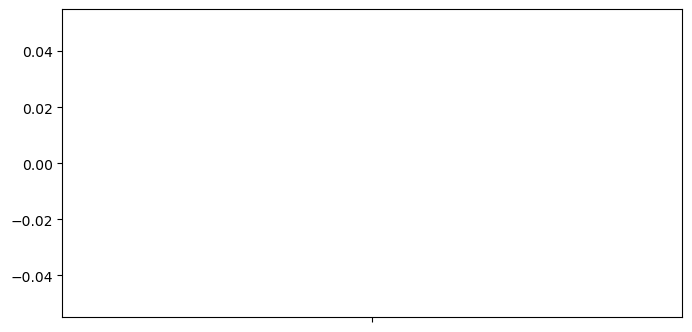

<Figure size 800x400 with 0 Axes>

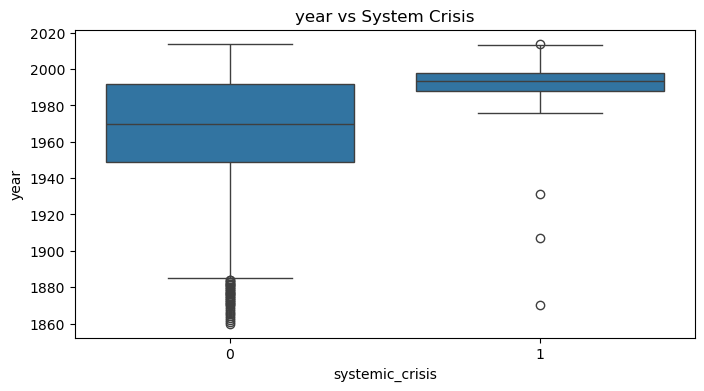

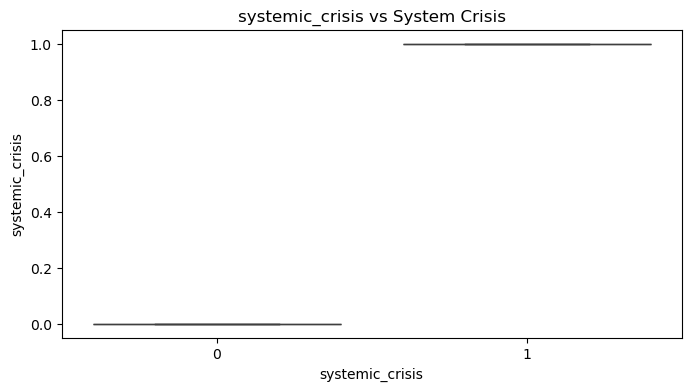

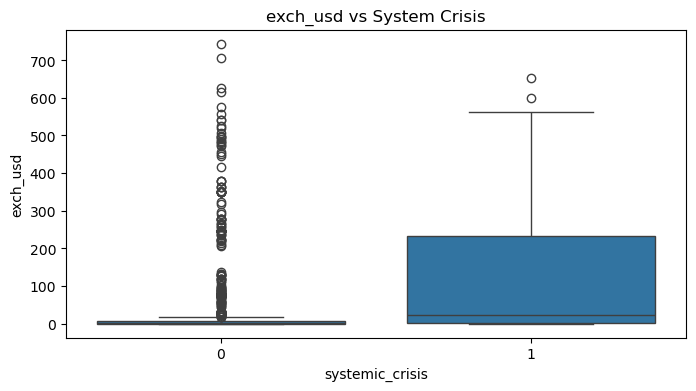

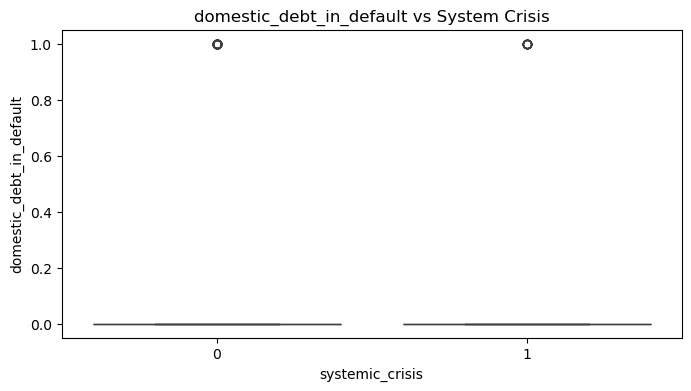

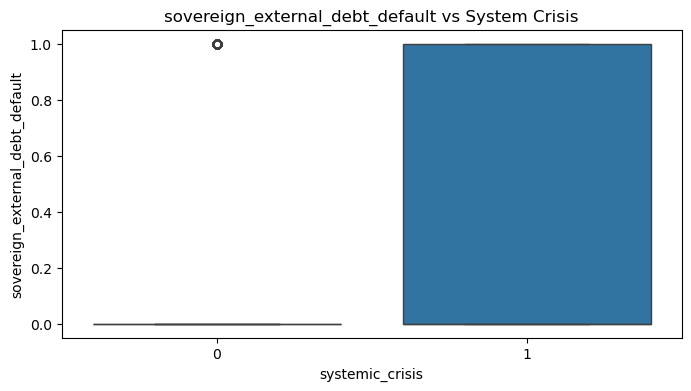

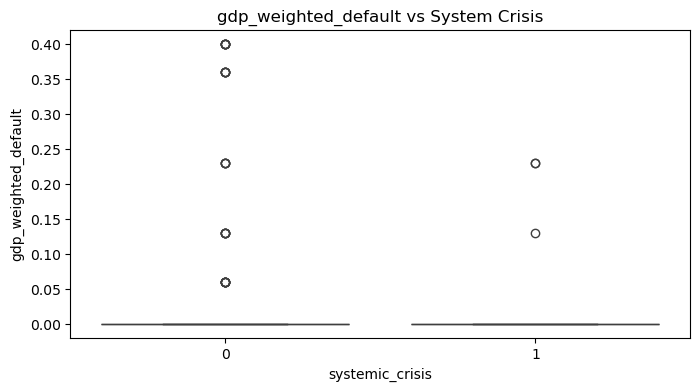

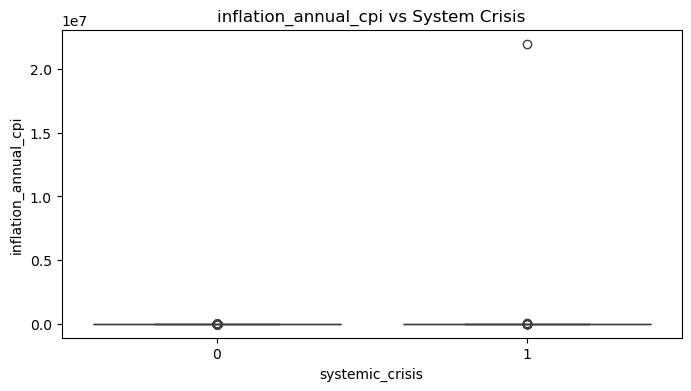

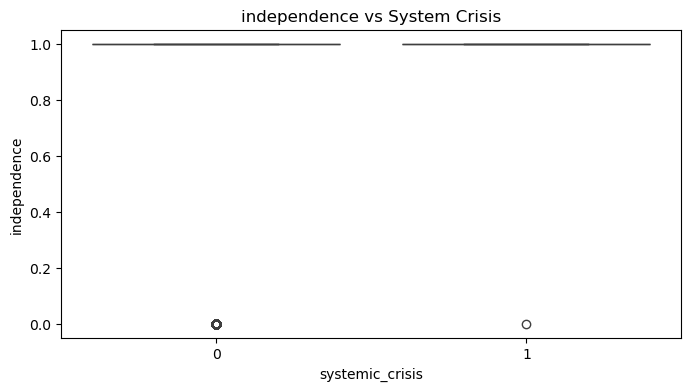

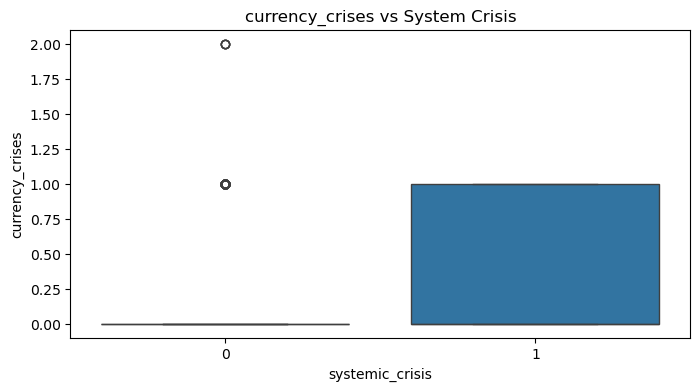

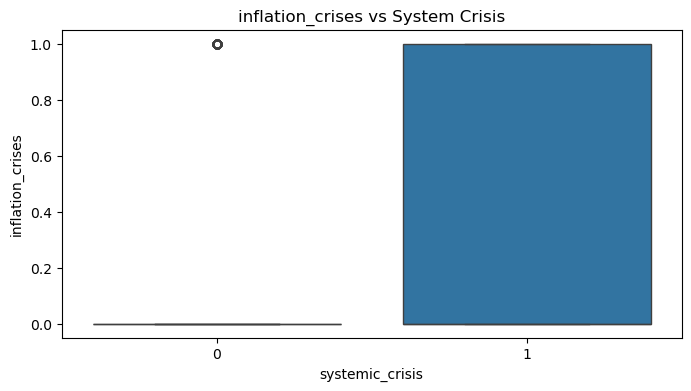

In [27]:
# Check for outliers in the numerical columns using boxplots
numerical_column = africa_data.select_dtypes(include = ['int64', 'float64']).columns
len(numerical_column)

# Loop through numerical columns for histograms
for col in numerical_column:
    plt.figure(figsize=(8, 4))
    sns.boxplot(africa_data, x = 'systemic_crisis', y = col)
    plt.title(f'{col} vs System Crisis')
    plt.show()

## Encode categorical features

In [75]:
# Define categorical features
categorical_columns = africa_data.select_dtypes(include = 'object')
categorical_columns

,country,banking_crisis
0,Algeria,crisis
1,Algeria,no_crisis
2,Algeria,no_crisis
3,Algeria,no_crisis
4,Algeria,no_crisis
...,...,...
1054,Zimbabwe,crisis
1055,Zimbabwe,no_crisis
1056,Zimbabwe,no_crisis
1057,Zimbabwe,no_crisis


In [77]:
# Encode the categorical data using label encoder
from sklearn.preprocessing import LabelEncoder

# Instantiate the label encoder
encoder = LabelEncoder()

# Fit and transform the categorical data
africa_data['banking_encode'] = encoder.fit_transform(africa_data['banking_crisis'])
africa_data['country_encode'] = encoder.fit_transform(africa_data['country'])

# Show the encoded data
africa_data[['banking_encode', 'country_encode']]

,banking_encode,country_encode
0,0,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1054,0,12
1055,1,12
1056,1,12
1057,1,12


In [78]:
africa_data['banking_crisis'].value_counts()

banking_crisis
no_crisis    965
crisis        94
Name: count, dtype: int64

In [80]:
# Drop the country and banking crisis columns
africa_encode = africa_data.drop(columns = ['country', 'banking_crisis'], axis = 1)

# View the data
africa_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             1059 non-null   int64  
 1   systemic_crisis                  1059 non-null   int64  
 2   exch_usd                         1059 non-null   float64
 3   domestic_debt_in_default         1059 non-null   int64  
 4   sovereign_external_debt_default  1059 non-null   int64  
 5   gdp_weighted_default             1059 non-null   float64
 6   inflation_annual_cpi             1059 non-null   float64
 7   independence                     1059 non-null   int64  
 8   currency_crises                  1059 non-null   int64  
 9   inflation_crises                 1059 non-null   int64  
 10  banking_encode                   1059 non-null   int32  
 11  country_encode                   1059 non-null   int32  
dtypes: float64(3), int32

## 2. Select your target variable and the features
   * All the columns will be used as the features except `systemic_crisis`, `year`
   * The target variable is `systemic_crisis`

In [81]:
# The features
X = africa_encode.drop(columns = ['year', 'systemic_crisis'], axis = 1)

# The target variable
y = africa_encode['systemic_crisis']

## 3. Split your dataset to training and test sets

In [82]:
# Import train_test_split from model_selection
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## 4. Based on your data exploration phase select a ML classification algorithm and train it on the training set

In [83]:
# Use LogisticRegression to train the data
from sklearn.linear_model import LogisticRegression

# Initialize the model
clf = LogisticRegression(max_iter = 100)

# Train the features to learn patterns
clf.fit(X_train, y_train)

LogisticRegression()

## 5. Assess your model performance on the test set using relevant evaluation metrics

In [84]:
# Import evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Predict on the test set and evaluate
y_pred = clf.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.9905660377358491
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       195
           1       0.94      0.94      0.94        17

    accuracy                           0.99       212
   macro avg       0.97      0.97      0.97       212
weighted avg       0.99      0.99      0.99       212

Confusion Matrix:
 [[194   1]
 [  1  16]]


In [85]:
# Use RandomForest to train the model
from sklearn.ensemble import RandomForestClassifier

# Instantiate the Random Forest model
random_model = RandomForestClassifier()

# Train the model
random_model.fit(X_train, y_train)

# Predict on the test set and evaluate
y_pred_rf = random_model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy Score: 0.9952830188679245
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       195
           1       1.00      0.94      0.97        17

    accuracy                           1.00       212
   macro avg       1.00      0.97      0.98       212
weighted avg       1.00      1.00      1.00       212

Confusion Matrix:
 [[195   0]
 [  1  16]]
